In [1]:
from pici.pici import Pici
from pici.communities.oem import OEMCommunityFactory
from pici.communities.osm import OSMCommunityFactory
from pici.communities.preciousplastic import PPCommunityFactory
import pandas as pd

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'karateclub', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
from cdlib import algorithms, viz
import networkx as nx

In [3]:
pd.options.plotting.backend = "plotly"

In [4]:
pici = Pici(
    communities={
        'OpenEnergyMonitor': OEMCommunityFactory,
        'OpenStreetMap': OSMCommunityFactory,
        'PreciousPlastic': PPCommunityFactory,
    },
    cache_dir='../../../cache',
    start='2017-01-01',
    end='2019-01-01',
    cache_nrows=500
)

In [5]:
oem_contr_g = pici.communities["OpenEnergyMonitor"].co_contributor_graph
oem_com_g = pici.communities["OpenEnergyMonitor"].commenter_graph

In [6]:
def plot_graph(g, communities='leiden', posalg='spring'):
    coms = None
    if communities == 'leiden':
        coms = algorithms.leiden(g, weights="weight")
    elif communities == 'thresh':
        coms = algorithms.threshold_clustering(g)
    elif communities == 'infomap':
        coms = algorithms.infomap(g)
    pos = None
    if posalg == 'spring':
        pos = nx.spring_layout(g, k=0.2, iterations=100)
    elif posalg == 'frucht':
        pos = nx.fruchterman_reingold_layout(g, k=0.2, iterations=100)
    elif posalg == 'circle':
        pos = nx.circular_layout(g)
    else:
        pos = nx.random_layout(g)
    return viz.plot_network_clusters(g, coms, pos, node_size=30)

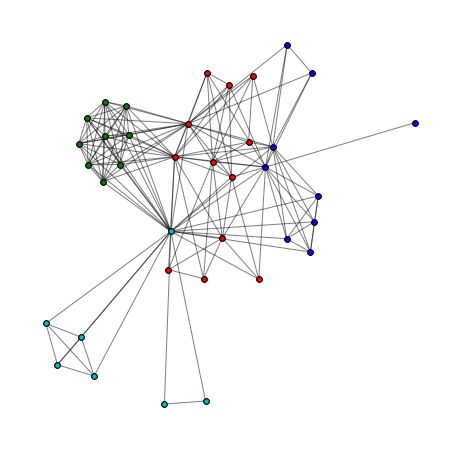

In [7]:
plot_graph(oem_contr_g, posalg='frucht')

In [8]:
# problems with installing infomap & wurlitzer packages in windows :(
plot_graph(oem_contr_g, communities='infomap', posalg='frucht')

ModuleNotFoundError: Optional dependency not satisfied: install package wurlitzer to use infomap.

In [ ]:
plot_graph(oem_com_g, communities='thresh', posalg='random')